투영변환을 구현해보자. 스캔의 효과 같이

In [1]:
import numpy as np
import cv2
import cv2_plus

이미지 불러오기

In [2]:
img = cv2.imread('images/transform.png')

변환 지점 설정하기<br>
[50, 50] => [70, 100]

In [3]:
pts1 = np.float32([[50, 50], [200, 50], [20, 200]])
pts2 = np.float32([[70, 90], [250, 60], [120, 200]])

In [4]:
list(pts1[0])

[50.0, 50.0]

이미지에 도형 및 text 넣기는 [여기](https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html)를 참고하자

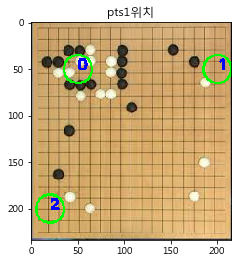

In [5]:
for i in range(len(pts1)):
    cv2.circle(img, tuple(pts1[i]), 15, (0,255,0),2)
    cv2.putText(img, str(i),tuple(pts1[i]),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2 )
cv2_plus.imshow(img, 'pts1위치')

### Affine Transformation
이미지 내에서 선의 평행성을 유지시키며 이미지를 변환시키는 작업니다.<br>
회전, 이동, 확대, Scale, 반전, shearing까지 포함.<br>

3개의 Match가 되는 점이 있어야한다.<br>

참고<br>
http://blog.daum.net/shksjy/228
http://darkpgmr.tistory.com/79

cv2.getAffineTransform(pts1, pts2)
- pts1을 pts2로 affine변환
- 변환 행렬 return

In [6]:
M = cv2.getAffineTransform(pts1, pts2)

In [7]:
M

array([[  1.2       ,   0.57333333, -18.66666667],
       [ -0.2       ,   0.69333333,  65.33333333]])

**cv2.warpAffine는 이미지의 위치를 변환시킨다.**

cv2.warpAffine(img, M, dsize)
- img : 이미지
- M : 2X3 변환 행렬 (M = [[M11, M12, M13],[M21, M22, M23]] 형태이다.)
- dsize : output 이미지 size

cv2.warpAffine()함수는 이미지에서 좌표(a,b)를 (M11*a, M12*b + M13, M21*a + M22*b, M23)으로 변환한다.

일부 점들을 이동시키면 나머지 평행에 있는 모든 픽셀도 옮겨진다. 또한 여백은 검은색으로 표시된다.

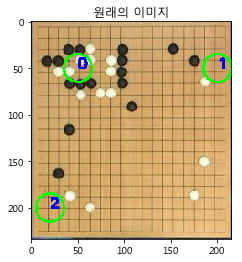

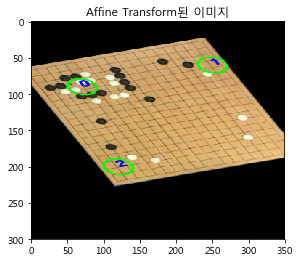

In [8]:
result = cv2.warpAffine(img, M, (350, 300))

cv2_plus.imshow(img, '원래의 이미지')
cv2_plus.imshow( result,'Affine Transform된 이미지')